In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em; 
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.8em;
line-height:1.1em;
padding-left:0em;
padding-right:0em;
}
</style>
""")

%pylab inline

matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25})#'font.family': 'serif'})
#print(plt.style.available)
#style.use('dark_background')
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [2]:
def smooth(x,window_len=10,window='hanning'):
    import numpy
    """smooth the data using a window with requested size.

    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.

    input:
        x: the input signal
        window_len: the dimension of the smoothing window
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal

    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)

    see also:

    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter

    TODO: the window parameter could be the window itself if an array instead of a string
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[2*x[0]-x[window_len:1:-1],x,2*x[-1]-x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='same')
    return y[window_len-1:-window_len+1]


In [3]:
from tools import read_density
pylab.rcParams['figure.figsize'] = (22.0, 10.0)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25})#,'font.family': 'serif'})

In [4]:
nx = 500
ny = 500
x = linspace(0.01, 3.0,nx)
y = linspace(0.0,5.5,ny)
#plt.figure(3,figsize = (10,5))
delta_s = 80.0
flow_depth = linspace(0.5,10,nx)
fac1 = 0.9
fac2 = fac1
fac3 = delta_s / pi


In [5]:
#dens1, dens1 = read_density(x,y)

In [6]:
def uz(z):
    tt=z/z_0
    if tt<1.0:tt=1.0
    default=us/0.41*log(tt)
    #default=ub*(eta-z_0)*log(z/z_0)*(z_0-eta+eta*log(eta/z_0))**(-1.0)
    return abs(default)

def usstarcr(dg):
    uscr=0.0000001
    nu=1.0004E-6
    gra=9.81
    rho=1000.0
    rhos=2650.
    gamma=gra*(rhos-rho)
    for i in range(50):
        #print locx, locy
        xr=uscr*dg/nu
        yr=0.15*xr**(-1.0)+0.05*exp(-8.0*xr**(-0.9))
        uscr=sqrt(dg*gamma*yr/rho)
    return uscr


def find_ub(uss,etaa,z_00):
    k=0.41
    return uss/k*(z_00-etaa+etaa*log(etaa/z_00))/(etaa-z_00)



In [7]:
gdia=1.0e-3
z_0=gdia/15.
us = usstarcr(gdia)
l_x = linspace(x[0]*delta_s/pi,x[-1]*delta_s/pi,50000)
l_y = linspace(y[0],y[-1],50000)
uu = zeros(len(l_x))
froude = zeros(len(l_x))

for i in range(len(l_x)):
    uu[i] = find_ub(us,l_x[i],z_0)
froude[:] =  uu[:]/sqrt(9.81*l_y[:])
#print(uu)

/home/weiszr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [8]:
def from_data(x_i1,x_i2,arr1,arr2,y_offset):
    nx = len(arr1)
    for i in range(nx):
        if arr1[i] >= x_i1:
            start_index = i
            break
    for i in range(nx):
        if arr1[i] >= x_i2:
            end_index = i
            break
    factor = linspace(2.5,5.0,(end_index - start_index))
    #print(start_index,end_index)
    newx = arr1[start_index:end_index]
    newy = arr2[start_index:end_index]-(y_offset*factor[:])
    return newx,newy
def scen1(x1,x2,x3,x4,y1,y2,y3,y4):
    xx = [x1,x2,x3,x4]
    yy = [y1,y2,y3,y4]
    #print(xx)
   # print(yy)
    newx= linspace(xx[-1],xx[0],500)
    newy = numpy.interp(newx,xx,yy)
    #print(newx)
    #print(newy)
    return newx,newy

def resample(new_x, old_x,old_y):
    return interp(new_x,old_x,old_y)

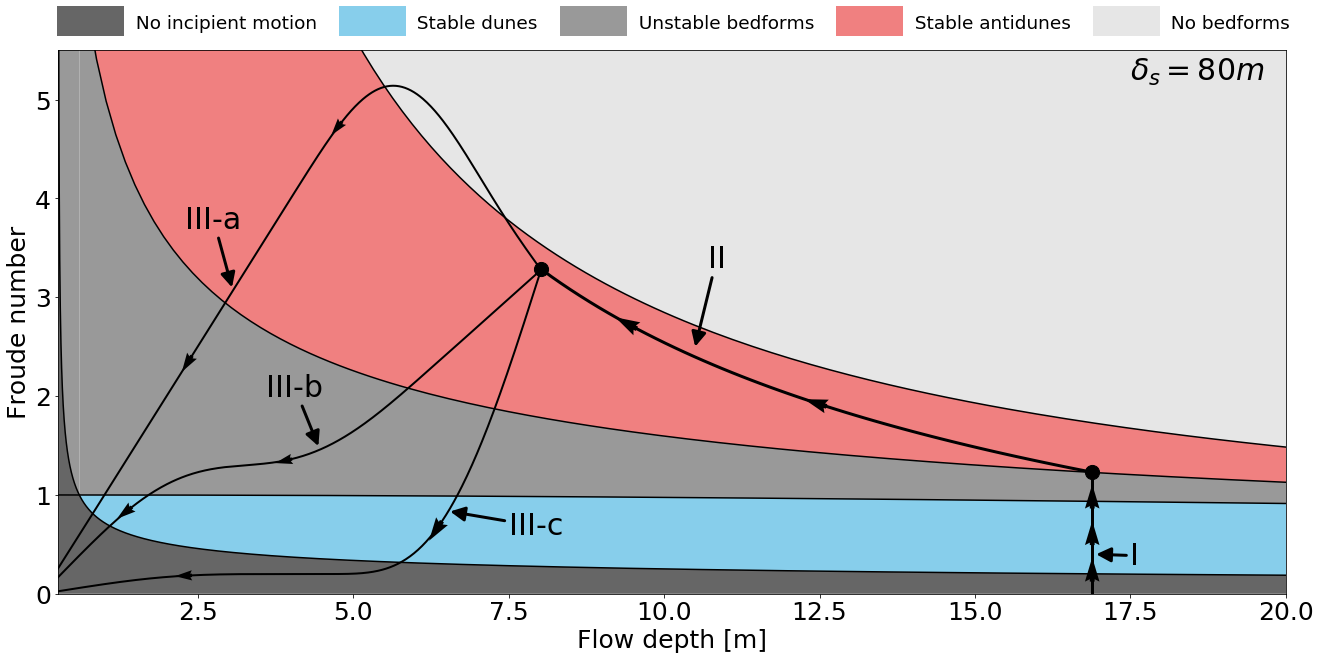

In [41]:
s1_x,s1_y = from_data(8.0,17.0,x*delta_s/pi,(sqrt(fac1*x* tanh(fac2*x))**(-1.0)-0.04),0.1)
#ss1_y = smooth(s1_y)
arrow_s1_x = []
arrow_s1_y = []
arrow_s1_dx = []
arrow_s1_dy = []
for i in range(10,50,20):
    arrow_s1_x.append(s1_x[i])
    arrow_s1_y.append(s1_y[i])
    arrow_s1_dx.append(s1_x[i-1]-s1_x[i])
    arrow_s1_dy.append(s1_y[i-1]-s1_y[i])

s2_x,s2_y = scen1(x[0],2.0,4.5,s1_x[0],0.0,1.3,1.3,s1_y[0])
arrow_s2_x = []
arrow_s2_y = []
arrow_s2_dx = []
arrow_s2_dy = []
ss2_y = smooth(s2_y,250)
for i in range(250,500,160):
    arrow_s2_x.append(s2_x[i])
    arrow_s2_y.append(ss2_y[i])
    arrow_s2_dx.append(s2_x[i]-s2_x[i-1])
    arrow_s2_dy.append(ss2_y[i]-ss2_y[i-1])


s3_x,s3_y = scen1(x[0],2.0,6.5,s1_x[0],0.0,0.2,0.2,s1_y[0])
arrow_s3_x = []
arrow_s3_y = []
arrow_s3_dx = []
arrow_s3_dy = []
ss3_y = smooth(s3_y,250)
for i in range(100,500,250):
    arrow_s3_x.append(s3_x[i])
    arrow_s3_y.append(ss3_y[i])
    arrow_s3_dx.append(s3_x[i]-s3_x[i-1])
    arrow_s3_dy.append(ss3_y[i]-ss3_y[i-1])



s4_x,s4_y = scen1(x[0],5.9,7.0,s1_x[0],0.0,5.9,4.0,s1_y[0])
arrow_s4_x = []
arrow_s4_y = []
arrow_s4_dx = []
arrow_s4_dy = []
ss4_y = smooth(s4_y,250)
for i in range(200,500,150):
    arrow_s4_x.append(s4_x[i])
    arrow_s4_y.append(ss4_y[i])
    arrow_s4_dx.append(s4_x[i]-s4_x[i-1])
    arrow_s4_dy.append(ss4_y[i]-ss4_y[i-1])

s5_x = zeros(nx)
s5_x[:] = s1_x[-1]
s5_y = linspace(0,s1_y[-1],nx)
arrow_s5_x = []
arrow_s5_y = []
arrow_s5_dx = []
arrow_s5_dy = []
for i in range(50,450,150):
    arrow_s5_x.append(s5_x[i])
    arrow_s5_y.append(s5_y[i])
    arrow_s5_dx.append(s5_x[i]-s5_x[i-1])
    arrow_s5_dy.append(s5_y[i]-s5_y[i-1])


cmap = plt.get_cmap("Blues")
#pcolor(x*delta_s/pi,y,dens1.T,cmap=cmap)

line1 = resample(l_x, x*delta_s/pi,sqrt(tanh(x)/x))
line2 = resample(l_x, x*delta_s/pi,sqrt(1/x))
line3 = resample(l_x, x*delta_s/pi,(sqrt(fac1*x* tanh(fac2*x))**(-1.0)-0.04))
plot(l_x,line3,'k-')
fill_between(l_x,line3,10,facecolor=(0.9,0.9,0.9))
plot(l_x,line2,'k-')
fill_between(l_x,line2,line3,facecolor='lightcoral')
plot(l_x,line1,'k-')
fill_between(l_x,line1,line2,where=line1>=froude,facecolor=(0.6,0.6,0.6))
fill_between(l_x,froude,line2,where=froude>=line1,facecolor=(0.6,0.6,0.6))
plot(l_x,froude,'k-')
fill_between(l_x,froude,line1,where=froude<=line1,facecolor='skyblue')
fill_between(l_x,0.0,froude,facecolor=(0.4,0.4,0.4))


#fill_between(x*delta_s/pi,(sqrt(fac1*x* tanh(fac2*x))**(-1.0)-0.04),10,facecolor=(0.9,0.9,0.9))
#plot(x*delta_s/pi,(sqrt(fac1*x* tanh(fac2*x))**(-1.0)-0.04),'k-')
# fill_between(x*delta_s/pi,(sqrt(fac1*x* tanh(fac2*x))**(-1.0)-0.04),sqrt(1/x),facecolor='lightcoral')
# plot(x*delta_s/pi, sqrt(tanh(x)/x),'k-')
# fill_between(x*delta_s/pi, sqrt(tanh(x)/x),sqrt(1/x),facecolor=(0.6,0.6,0.6))
# plot(x*delta_s/pi, sqrt(1/x),'k-')
# fill_between(l_x,froude,newy1,facecolor='skyblue')

ind=1
ss2_y[-1]=s1_y[0]
ss3_y[-1]=s1_y[0]
ss4_y[-1]=s1_y[0]
s1_y[0]=ss2_y[0]
s1_x[0]=s2_x[1]
plot(s1_x,s1_y,'k-',lw=3)
plot(s5_x,s5_y,'k-',lw=3)

plot(s2_x[ind:-1],ss2_y[ind:-1],'k-',lw=2)
plot(s3_x[ind:-1],ss3_y[ind:-1],'k-',lw=2)
plot(s4_x[ind:-1],ss4_y[ind:-1],'k-',lw=2)
quiver(arrow_s1_x,arrow_s1_y,arrow_s1_dx,arrow_s1_dy,angles='xy',scale_units='width',scale=8.1,color='k')
quiver(arrow_s2_x,arrow_s2_y,arrow_s2_dx,arrow_s2_dy,angles='xy',scale_units='width',scale=1.16,color='k')
quiver(arrow_s3_x,arrow_s3_y,arrow_s3_dx,arrow_s3_dy,angles='xy',scale_units='width',scale=1.16,color='k')
quiver(arrow_s4_x,arrow_s4_y,arrow_s4_dx,arrow_s4_dy,angles='xy',scale_units='width',scale=1.46,color='k')
quiver(arrow_s5_x,arrow_s5_y,arrow_s5_dx,arrow_s5_dy,angles='xy',scale_units='width',scale=0.125,color='k')

annotate('I', xy=(16.95, 0.4), xytext=(17.5, 0.3),size=30,
             arrowprops=dict(arrowstyle="-|>",lw=3,fc='k', shrinkB=0))

annotate('II', xy=(10.5, 2.5), xytext=(10.7, 3.3),size=30,
             arrowprops=dict(arrowstyle="-|>",lw=3,fc='k', shrinkB=0))

annotate('III-a', xy=(3.05, 3.1), xytext=(2.3, 3.7),size=30,
             arrowprops=dict(arrowstyle="-|>",lw=3,fc='k', shrinkB=0))

annotate('III-b', xy=(4.5, 1.4), xytext=(3.6, 2.0),size=30,
             arrowprops=dict(arrowstyle="-|>",lw=3,fc='k', shrinkB=10))

annotate('III-c', xy=(6.4, 0.85), xytext=(7.5, 0.6),size=30,
             arrowprops=dict(arrowstyle="-|>",lw=3,fc='k',shrinkB=10))

scatter(s1_x[0],s1_y[0],200,color='k')
scatter(s1_x[-1],s1_y[-1],200,color='k')
ylim(0.,5.5);
xlim(x[0]*delta_s/pi,20);
xlabel('Flow depth [m]');
ylabel('Froude number');
plot([],[],color=(0.4,0.4,0.4),lw =30,label='  No incipient motion')
plot([],[],color='skyblue',lw =30,label='  Stable dunes')
plot([],[],color=(0.6,0.6,0.6),lw =30,label='  Unstable bedforms')
plot([],[],color='lightcoral',lw =30,label='  Stable antidunes')
plot([],[],color=(0.9,0.9,0.9),lw =30,label='  No bedforms')
legend(fontsize=18.5,loc=(0.005, 1.02),ncol=5,frameon = False)
text(17.5,5.2,'$\delta_s = 80 m$',size =30)
savefig("Figure_rundown.png",dpi=500, bbox_inches='tight', transparent=True)

In [10]:
print(froude)

[        inf 13.3798696   9.46871001 ...  0.10680864  0.10680774
  0.10680684]
